<center><h1>Section 5-2A Output Graphics</h1></center>

In [1]:
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib widget
%matplotlib inline

In [2]:
root_directory = os.path.dirname(os.path.dirname(os.getcwd()))
json_file_list = [
    'processed/RESULTS5-2A-EnergyPlus-9.0.1.json', 
    'processed/RESULTS5-2A-BSIMAC-9-9.0.74.json', 
    'processed/RESULTS5-2A-CSE-0.861.1.json']
notebook_name = 'RESULTS5-2A.ipynb'
html_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'rendered', 'html')

In [3]:
# Parameters
root_directory = "/home/jgrando/Documents/GARD/ASHRAE140Automation"
json_file_list = [
    "processed/RESULTS5-2A-EnergyPlus-9.0.1.json",
    "processed/RESULTS5-2A-CSE-0.861.1.json",
]
notebook_name = "/home/jgrando/Documents/GARD/ASHRAE140Automation/rendered/notebooks/test_notebook.ipynb"


In [4]:
from IPython.core.display import HTML
HTML("""
<style>
.jp-RenderedImage {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [5]:
json_data = {}
for f in json_file_list:
    file_path = os.path.join(root_directory, f) 
    with open(file_path, 'r') as jf:
        data = json.load(jf)
        json_data[str(os.path.basename(f)).replace('.json', '')] = data

In [6]:
# Fig B8-9
import numpy as np

labels = []
data = []
programs = []
cases = ['395', '600']
for idx, (tst, json_obj) in enumerate(json_data.items()):
    tmp_data = []
    for case in cases:
        tmp_data.append(json_obj['conditioned_zone_loads_non_free_float'][case]['peak_heating_kW'])
    data.insert(idx, tmp_data)
    programs.insert(idx, json_obj['identifying_information']['software_name'])
    
hatches = ['/', '\\', 'o', '//'][:len(data)]

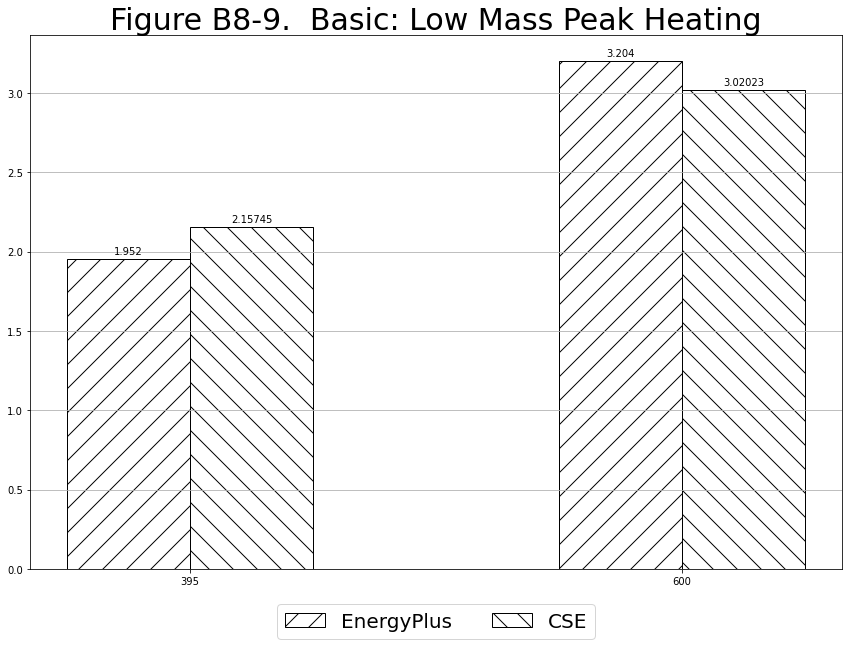

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12,8), sharex=True)
fig.tight_layout()

width = 0.25

ax.set_xticks(np.arange(max([len(i) for i in data])))
ax.set_title('Figure B8-9.  Basic: Low Mass Peak Heating', fontsize=30)
ax.set_xticklabels(cases)
for idx, (p, d, h) in enumerate(zip(programs, data, hatches)):
    x = np.arange(len(d))
    rects = ax.bar(x + (width * idx) - (width/2 * (len(data) - 1)), d, width, label=p, hatch=h, fill=None)
    ax.bar_label(rects, padding=3)

ax.grid(which='major', axis='y')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=len(programs), fontsize=20)

plt.show();